# Downloading And Preprocessing A Suitable Dataset

We need a dataset consisting of voice samples from both genders.

This dataset must be processed before use.

We will be using [this](https://www.kaggle.com/datasets/ogechukwu/voice) dataset from Kaggle.

In [ ]:
# Lets start with downloading a dataset from kaggle
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
# https://www.kaggle.com/datasets/ogechukwu/voice
! kaggle datasets download ogechukwu/voice

 99% 797M/802M [00:06<00:00, 141MB/s]
100% 802M/802M [00:06<00:00, 128MB/s]


In [ ]:
# Unzip the dataset to a temporary loaction
!unzip '/content/voice.zip' -d '/content/K_voice'

In [ ]:
import os

# Get a list of all of the voices in the dataset
def get_files(path='/content/K_voice', ftype='.wav'):
  ftype = ftype.lower()
  current_dir_items = os.listdir(path)
  results = list()
  for itemname in current_dir_items:
    item = os.path.join(path, itemname)
    if os.path.isdir(item):
      files = get_files(path=item)
      results = results + files
    elif os.path.isfile(item):
      if item.lower().endswith(ftype):
        results.append(item)
  return results

voices = get_files()
len(voices)

3964

In [ ]:
import pandas as pd

# Lets take a look at the dataset information 
labels = pd.read_excel('/content/K_voice/BVC_Voice_Bio_Public.xlsx')
labels

,New_ID,Sex,Age,Ethnicity,Unnamed: 4,Unnamed: 5
0,4001,'Male',19,'Igbo',NaN,336
1,4002,'Male',23,'Igbo',NaN,190
2,4003,'Female',18,'Ikwerre',NaN,NaN
3,4004,'Male',23,'Annang',NaN,% Actual subjects = 526
4,4005,'Female',17,'Igbo',NaN,% Male subjects = 336
...,...,...,...,...,...,...
555,4993,'Male',18,'Igede',NaN,NaN
556,4994,'Male',17,'Okirika',NaN,NaN
557,4995,'Male',22,'Igbo',NaN,NaN
558,4998,'Female',23,'Igbo',NaN,NaN


In [ ]:
# We are only interested in the genders of the speakers
labels = labels.set_index('New_ID')
labels = labels[['Sex']]
labels = labels.to_dict()
labels = labels['Sex']
labels

{4001: "'Male'",
 4002: "'Male'",
 4003: "'Female'",
 4004: "'Male'",
 4005: "'Female'",
 4006: "'Female'",
 4007: "'Female'",
 4008: "'Female'",
 4010: "'Male'",
 4011: "'Female'",
 4012: "'Female'",
 4020: "'Female'",
 4021: "'Female'",
 4022: "'Male'",
 4026: "'Male'",
 4028: "'Female'",
 4029: "'Female'",
 4030: "'Male'",
 4032: "'Female'",
 4033: "'Female'",
 4036: "'Male'",
 4037: "'Male'",
 4038: "'Female'",
 4040: "'Female'",
 4042: "'Male'",
 4043: "'Male'",
 4048: "'Female'",
 4051: "'Male'",
 4055: "'Female'",
 4056: "'Male'",
 4057: "'Male'",
 4059: "'Female'",
 4061: "'Male'",
 4062: "'Female'",
 4063: "'Male'",
 4065: "'Male'",
 4066: "'Male'",
 4067: "'Female'",
 4068: "'Female'",
 4069: "'Male'",
 4070: "'Male'",
 4073: "'Male'",
 4074: "'Male'",
 4075: "'Female'",
 4076: "'Male'",
 4078: "'Male'",
 4079: "'Male'",
 4082: "'Male'",
 4083: "'Female'",
 4085: "'Male'",
 4086: "'Male'",
 4087: "'Male'",
 4088: "'Female'",
 4089: "'Male'",
 4092: "'Female'",
 4096: "'Female

In [ ]:
# Create a list for each gender to store associated IDs
males = list()
females = list()
for key in labels:
  if labels[key] == "'Male'":
    males.append(int(key))
  elif labels[key] == "'Female'":
    females.append(int(key))

print(len(males))
print(len(females))
print(len(males) + len(females))

363
197
560


In [ ]:
import shutil
import re

# Move and rename all of the voices to a new directory
# New names are in a suitable format for future uses

# Make the new directory
!mkdir '/content/voice_dataset'

# A function to read ID of each voice, get its gender and save it to anothe
# directory with a new name.
def smart_copy_files(files, dest='/content/voice_dataset'):
  f_count = 0
  for f in files:
    file_name = os.path.basename(f).split('/')[-1]
    [realname, file_type] = file_name.split('.')
    voice_id = re.search("(?<=_)\d\d\d\d(?=_)", realname)[0]
    voice_id = int(voice_id)
    assert voice_id
    if voice_id in males:
      file_name = 'M_{0:04d}_M.{x}'.format(f_count, x=file_type)
      f_count += 1
    elif voice_id in females:
      file_name = 'F_{0:04d}_F.{x}'.format(f_count, x=file_type)
      f_count += 1
    final_dest = os.path.join(dest, file_name)
    shutil.copy(f, final_dest)
  return f_count


total = smart_copy_files(voices)
total

mkdir: cannot create directory ‘/content/voice_dataset’: File exists


3964

In [ ]:
# Lets zip our new dataset to save it somewhere else
!zip -r '/content/voice_dataset.zip' '/content/voice_dataset'

  adding: content/voice_dataset/ (stored 0%)
  adding: content/voice_dataset/M_3953_M.wav (deflated 38%)
  adding: content/voice_dataset/M_0315_M.wav (deflated 42%)
  adding: content/voice_dataset/F_1516_F.wav (deflated 37%)
  adding: content/voice_dataset/F_1221_F.wav (deflated 39%)
  adding: content/voice_dataset/M_0350_M.wav (deflated 38%)
  adding: content/voice_dataset/M_3247_M.wav (deflated 35%)
  adding: content/voice_dataset/M_0759_M.wav (deflated 37%)
  adding: content/voice_dataset/M_2753_M.wav (deflated 34%)
  adding: content/voice_dataset/F_2902_F.wav (deflated 37%)
  adding: content/voice_dataset/M_0408_M.wav (deflated 40%)
  adding: content/voice_dataset/F_0778_F.wav (deflated 37%)
  adding: content/voice_dataset/F_2951_F.wav (deflated 34%)
  adding: content/voice_dataset/M_0574_M.wav (deflated 40%)
  adding: content/voice_dataset/M_1497_M.wav (deflated 34%)
  adding: content/voice_dataset/M_3891_M.wav (deflated 38%)
  adding: content/voice_dataset/M_0578_M.wav (deflated 

In [ ]:
# Copy the new zip file
!cp '/content/voice_dataset.zip' '/content/drive/MyDrive/DadepardazAfagh/TASK12'

# Building And Training A Model For Classification

It is possible to classify sound using CNN image classification methods.

We will be using the spectrogram of the sound data for this purpose.

In [ ]:
# Extract the voices we processed before
!unzip '/content/drive/MyDrive/DadepardazAfagh/TASK12/voice_dataset.zip'

In [3]:
# Import and Install Dependencies

!pip install tensorflow_io

import os
from matplotlib import pyplot as plt
import tensorflow_io as tfio

import tensorflow as tf 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
  tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
# Build Dataloading Function
def load_wav_16k_mono(filename):
  # Load encoded wav file
  file_contents = tf.io.read_file(filename)
  # Decode wav (tensors by channels) 
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  # Removes trailing axis
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  # Goes from 44100Hz to 16000hz - amplitude of the audio signal
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
  return wav

In [5]:
# Check all the files for health and length
# Unsuitable files will be removed from the dataset
# Sounds shorter than 2 seconds will also be removed

lengths = []
bad_files = []
for f in os.listdir('content/voice_dataset'):
  file_path = os.path.join('content/voice_dataset', f)
  try:
    tensor_wave = load_wav_16k_mono(file_path)
  except:
    bad_files.append(file_path)
    os.remove(file_path)
    continue
  if len(tensor_wave) < 2 * 16000:
    bad_files.append(file_path)
    os.remove(file_path)
    continue
  lengths.append(len(tensor_wave))

In [6]:
# Unsuitable files
bad_files

['content/voice_dataset/M_3667_M.wav',
 'content/voice_dataset/M_0759_M.wav',
 'content/voice_dataset/F_3644_F.wav',
 'content/voice_dataset/F_2349_F.wav',
 'content/voice_dataset/F_1654_F.wav',
 'content/voice_dataset/M_3221_M.wav',
 'content/voice_dataset/M_3431_M.wav',
 'content/voice_dataset/M_3050_M.wav',
 'content/voice_dataset/F_2754_F.wav',
 'content/voice_dataset/M_2548_M.wav',
 'content/voice_dataset/M_2846_M.wav',
 'content/voice_dataset/F_2135_F.wav',
 'content/voice_dataset/F_1912_F.wav',
 'content/voice_dataset/M_2893_M.wav',
 'content/voice_dataset/F_3774_F.wav',
 'content/voice_dataset/F_1494_F.wav',
 'content/voice_dataset/M_2962_M.wav',
 'content/voice_dataset/M_2598_M.wav',
 'content/voice_dataset/F_1072_F.wav',
 'content/voice_dataset/F_0812_F.wav',
 'content/voice_dataset/M_0000_M.wav',
 'content/voice_dataset/F_2043_F.wav',
 'content/voice_dataset/M_2527_M.wav',
 'content/voice_dataset/F_0623_F.wav',
 'content/voice_dataset/F_0481_F.wav',
 'content/voice_dataset/M

In [7]:
display(len(lengths))
display(max(lengths))
display(min(lengths))
display(sum(lengths) / len(lengths))

977

127431

32002

41098.016376663254

In [9]:
# Create Tensorflow Datasets
male_files = tf.data.Dataset.list_files('content/voice_dataset/*M.wav', shuffle=False)
female_files = tf.data.Dataset.list_files('content/voice_dataset/*F.wav', shuffle=False)

# Add labels and Combine Positive and Negative Samples
males = tf.data.Dataset.zip((male_files, tf.data.Dataset.from_tensor_slices(tf.ones(len(male_files)))))
females = tf.data.Dataset.zip((female_files, tf.data.Dataset.from_tensor_slices(tf.zeros(len(female_files)))))
data = males.concatenate(females)

In [10]:
# Build Preprocessing Function to Convert Sound to Spectrogram

def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    # If the sound is longer than 2 seconds, use only the first 2 seconds
    wav = wav[:2 * 16000]
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

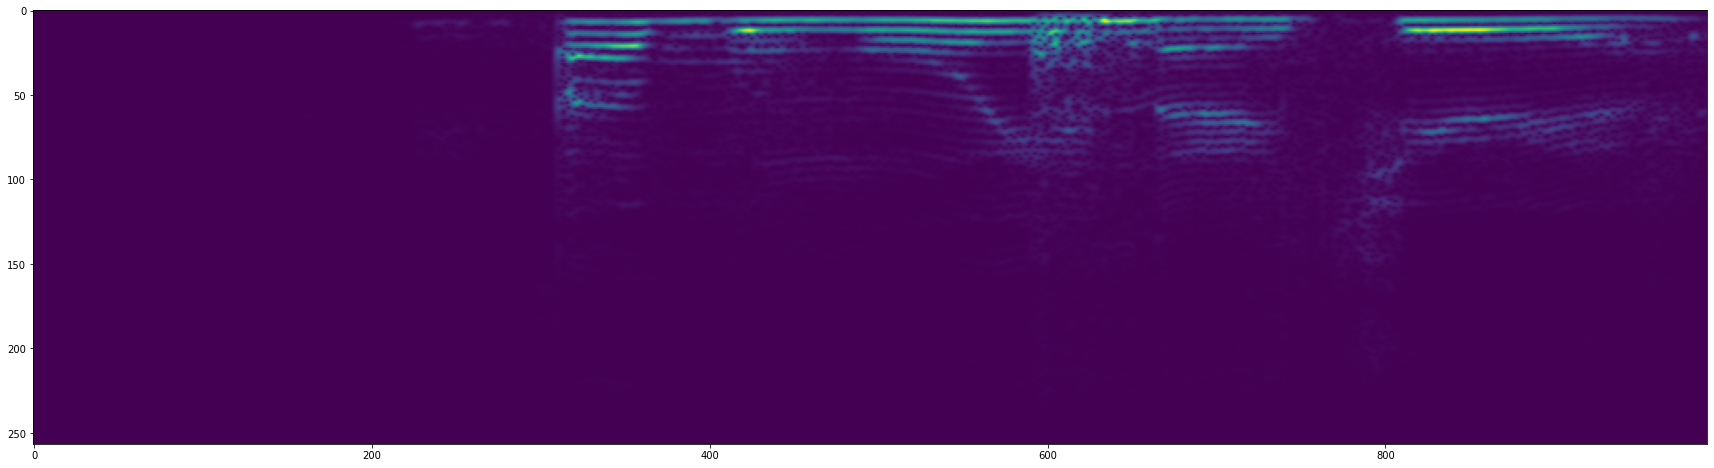

In [16]:
# Test Out the Function and Visualize the Spectrogram
# We will feed this data to our model for classification

filepath, label = females.shuffle(buffer_size=10000).as_numpy_iterator().next()

spectrogram, label = preprocess(filepath, label)

plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [17]:
# Create a Tensorflow Data Pipeline

data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [18]:
# Split into Training, Validation and Testing Partitions

n_batches = len(data)
n_train = int(n_batches * 0.8)
n_valid = int(n_batches * 0.15)
n_test = n_batches - n_train - n_valid

n_batches , n_train, n_valid, n_test

(62, 49, 9, 4)

In [19]:
train = data.take(n_train)
valid = data.skip(n_train).take(n_valid)
test = data.skip(n_train).skip(n_valid).take(n_test)

In [20]:
# Test One Batch to Check the Shape
# We Need to Know the Input Shape to Build Our Model

samples, labels = train.as_numpy_iterator().next()
samples.shape

(16, 991, 257, 1)

In [21]:
# Load Tensorflow Dependencies to Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [22]:
# Build Sequential Model, Compile and View Summary
# It Is Important To Use The Whole Spectrogram Without Resizing It
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(991, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 989, 255, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 987, 253, 16)      2320      
                                                                 
 flatten (Flatten)           (None, 3995376)           0         
                                                                 
 dense (Dense)               (None, 128)               511408256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 511,410,865
Trainable params: 511,410,865
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Fit Model
# It Is a Good Thing That It Will Not Take Long Because This Model Will Be
# 5.72 GB To save

hist = model.fit(train, epochs=10, validation_data=valid)

Epoch 1/10
49/49 [==============================] - 10s 200ms/step - loss: 8.2334 - recall_1: 0.7557 - precision_1: 0.7313 - val_loss: 0.4422 - val_recall_1: 0.8152 - val_precision_1: 0.8929
Epoch 2/10
49/49 [==============================] - 9s 189ms/step - loss: 0.4430 - recall_1: 0.8996 - precision_1: 0.8826 - val_loss: 0.3427 - val_recall_1: 0.9022 - val_precision_1: 0.9222
Epoch 3/10
49/49 [==============================] - 9s 193ms/step - loss: 0.2918 - recall_1: 0.9356 - precision_1: 0.9184 - val_loss: 0.2465 - val_recall_1: 0.9600 - val_precision_1: 0.8889
Epoch 4/10
49/49 [==============================] - 9s 190ms/step - loss: 0.1959 - recall_1: 0.9726 - precision_1: 0.9352 - val_loss: 0.1311 - val_recall_1: 0.9880 - val_precision_1: 0.9535
Epoch 5/10
49/49 [==============================] - 9s 188ms/step - loss: 0.0997 - recall_1: 0.9805 - precision_1: 0.9700 - val_loss: 0.0562 - val_recall_1: 1.0000 - val_precision_1: 1.0000
Epoch 6/10
49/49 [==============================]

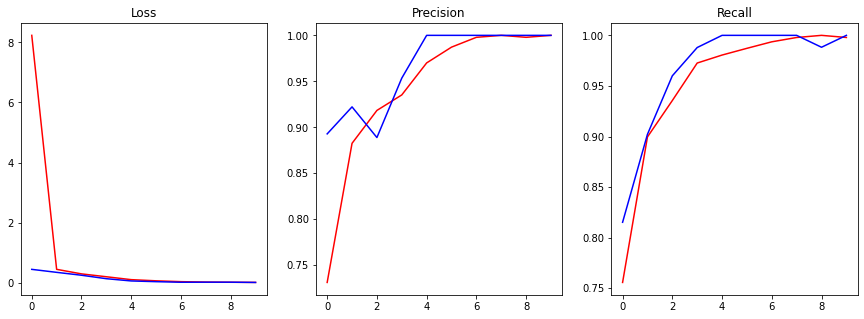

In [38]:
# View Loss and KPI Plots

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

axs[0].set_title('Loss')
axs[0].plot(hist.history['loss'], 'r')
axs[0].plot(hist.history['val_loss'], 'b')
axs[1].set_title('Precision')
axs[1].plot(hist.history['precision_1'], 'r')
axs[1].plot(hist.history['val_precision_1'], 'b')
axs[2].set_title('Recall')
axs[2].plot(hist.history['recall_1'], 'r')
axs[2].plot(hist.history['val_recall_1'], 'b')
fig.show()

# Testing and Using the Model On Test Data

Test the newly traind model for performance and build a function to implement the model for gender classification.

(16, 991, 257, 1)

1/1 [==============================] - 7s 7s/step


(16, 991, 257, 1)

1/1 [==============================] - 0s 34ms/step


(16, 991, 257, 1)

1/1 [==============================] - 0s 35ms/step


(1, 991, 257, 1)

1/1 [==============================] - 0s 124ms/step


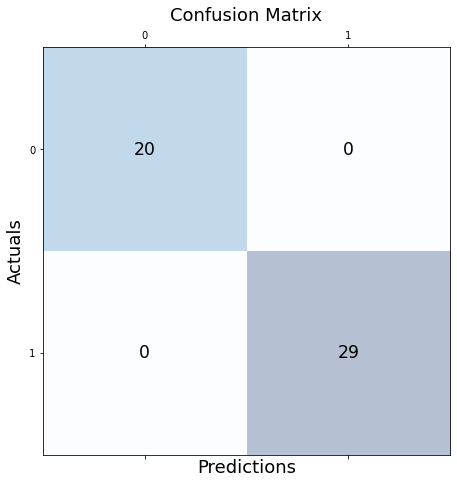

In [25]:
# Try the model on test dataset

y_all = []
yhat_all = []

for test_batch, y in test.as_numpy_iterator():
  display(test_batch.shape)
  y_all += list(y)
  yhat = model.predict(test_batch)
  yhat_all += list(yhat)

y_all = [1 if prediction > 0.5 else 0 for prediction in y_all]
yhat_all = [1 if prediction > 0.5 else 0 for prediction in list(yhat_all)]

# Calculate confusion matrix
conf_mat = tf.math.confusion_matrix(y_all,yhat_all)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5)) 
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3) 
for i in range(conf_mat.shape[0]): 
  for j in range(conf_mat.shape[1]): 
    ax.text(x=j, y=i,s=int(conf_mat[i, j]), va='center', ha='center', size='xx-large') 
    plt.xlabel('Predictions', fontsize=18) 
    plt.ylabel('Actuals', fontsize=18) 
    plt.title('Confusion Matrix', fontsize=18) 
plt.show()

In [44]:
# A function for implementing the model on real world data
def voice_gender(model, file_path, window=2*16000):
  # Read the sound into numerical data
  wav = load_wav_16k_mono(file_path)

  # Perform zero padding if the sound is shorter than 2 seconds
  if len(wav) < window:
    zero_padding = tf.zeros([window] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    spectrogram = tf.expand_dims(spectrogram, axis=0)
    res = model.predict(spectrogram, verbose=0)
    return float(res)
  
  # Perform sliding window method for longer sounds
  slides = len(wav) // window
  if len(wav) % window != 0:
    zero_padding = tf.zeros([(slides+1)*window] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    slides += 1

  results = []
  for s in range(slides):
    wav_ = wav[s*window : (s+1)*window]
    spectrogram = tf.signal.stft(wav_, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    spectrogram = tf.expand_dims(spectrogram, axis=0)
    res = model.predict(spectrogram, verbose=0)
    results.append(res)

  return float(sum(results) / len(results))

In [45]:
# Test a long voice of a man

MALE_long_audio_path = 'content/voice_dataset/M_0659_M.wav'
g = voice_gender(model, MALE_long_audio_path)

if g > 0.5:
  print('Male')
else:
  print('Female')

Male


In [48]:
# Test a long voice of a woman

FEMALE_long_audio_path = 'content/voice_dataset/F_0276_F.wav'
g = voice_gender(model, FEMALE_long_audio_path)

if g > 0.5:
  print('Male')
else:
  print('Female')

Female
